In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats 
from scipy.stats import pearsonr
from datetime import datetime
#importer le fichier csv
path_q1 = 'https://raw.githubusercontent.com/murpi/wilddata/master/test/history.csv'
df1=pd.read_csv(path_q1)

In [3]:
df1

,DATE,ITEM,SALES
0,02-01-2019,A,113
1,03-01-2019,A,143
2,04-01-2019,A,145
3,05-01-2019,A,167
4,06-01-2019,A,202
...,...,...,...
515,25-12-2019,B,96
516,26-12-2019,B,85
517,27-12-2019,B,87
518,28-12-2019,B,79


In [5]:
#transformer la colonne date en format date
df1['DATE'] = pd.to_datetime(df1['DATE'])

In [6]:
#extraire le mois de la date
df1["month"] = df1["DATE"].dt.month

In [7]:
#en utilisant le modulo ainsi que la division euclidienne nous pouvons distinguer les saisons (1 : hiver, 2 : printemps, 3 : été, 4 : automne)
df1["saison"]=df1["month"]%12 //3+1 
df1.tail()

,DATE,ITEM,SALES,month,saison
515,2019-12-25,B,96,12,1
516,2019-12-26,B,85,12,1
517,2019-12-27,B,87,12,1
518,2019-12-28,B,79,12,1
519,2019-12-29,B,76,12,1


In [8]:
#Grouper les ventes par saison ainsi que par produits en faisant la somme des ventes
df1_saison_item=df1.groupby(["saison","ITEM"])

df1_saison_item.sum("SALES")

SALES  month
saison ITEM              
1      A      6032    313
       B      5504    313
2      A      5102    257
       B      7374    257
3      A      4585    474
       B      9802    474
4      A      6466    651
       B      6203    651

Le fichier manque de données, nous avons 520 lignes pour representer les ventes de 2 produits sur une année, ce qui implique d'avoir 365*2 = 730 lignes
Nous remarquons que les ventes des produits B sont accrues au printemps ainsi qu'en été (9802)
tandis que le produit A est plebicité en hiver ainsi qu'en automne (6466 ventes)

une eventuelle corrélation avec la saison est envisageable, de plus amples analyses permetteront de la déceller

In [52]:
#importer le fichier csv pour toutes les villes
path_Bordeaux = 'https://raw.githubusercontent.com/murpi/wilddata/master/test/bordeaux2019.csv'
path_Lille = 'https://raw.githubusercontent.com/murpi/wilddata/master/test/lille2019.csv'
path_Lyon = 'https://raw.githubusercontent.com/murpi/wilddata/master/test/lyon2019.csv'
path_Marseille = 'https://raw.githubusercontent.com/murpi/wilddata/master/test/marseille2019.csv'
#j'utilise skiprows car les 3 premieres lignes du fichier csv ne conviennent pas
dfBo=pd.read_csv(path_Bordeaux,skiprows=3)
dfLi=pd.read_csv(path_Lille,skiprows=3)
dfLy=pd.read_csv(path_Lyon,skiprows=3)
dfMa=pd.read_csv(path_Marseille,skiprows=3)

In [54]:
#merge les deux fichier csv
dfBo['DATE'] = pd.to_datetime(dfBo['DATE'])
dfBo2=pd.merge(df1,dfBo,on="DATE",how="right")
dfBo2.head()

,DATE,ITEM,SALES,month,saison,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,...,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2019-01-01,NaN,NaN,NaN,NaN,9,2,8,2,7,...,9,5,1,143,116,116,0,1,6.9,météo très défavorable
1,2019-01-02,A,213.0,1.0,1.0,9,4,14,5,7,...,9,3,2,122,116,116,0,1,8.7,météo très défavorable
2,2019-01-02,B,0.0,1.0,1.0,9,4,14,5,7,...,9,3,2,122,116,116,0,1,8.7,météo très défavorable
3,2019-01-03,A,80.0,1.0,1.0,7,2,15,1,5,...,7,0,-2,116,116,116,0,1,8.7,météo très défavorable
4,2019-01-03,B,94.0,1.0,1.0,7,2,15,1,5,...,7,0,-2,116,116,116,0,1,8.7,météo très défavorable


In [55]:
#nettoyer les données en supprimant les lignes ne contenant pas d'informations sur les ventes des produits
dfBo2.dropna(inplace=True)
dfBo2.sort_values(by=["ITEM","DATE"],inplace=True)
#créer 2 tableau distinct l'un pour le produit A l'autre pour le B
dfBoA=dfBo2[(dfBo2["ITEM"] == "A")]
dfBoB=dfBo2[(dfBo2["ITEM"] == "B")]
dfBoA.head()

,DATE,ITEM,SALES,month,saison,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,...,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
1,2019-01-02,A,213.0,1.0,1.0,9,4,14,5,7,...,9,3,2,122,116,116,0,1,8.7,météo très défavorable
3,2019-01-03,A,80.0,1.0,1.0,7,2,15,1,5,...,7,0,-2,116,116,116,0,1,8.7,météo très défavorable
6,2019-01-05,A,48.0,1.0,1.0,6,1,9,0,4,...,6,0,-1,116,116,116,0,1,8.7,météo très défavorable
8,2019-01-06,A,30.0,1.0,1.0,5,0,10,-1,4,...,5,0,-2,143,116,116,0,1,8.7,météo très défavorable
11,2019-01-08,A,65.0,1.0,1.0,9,6,10,5,8,...,9,8,4,248,143,266,0,1,3.4,météo défavorable


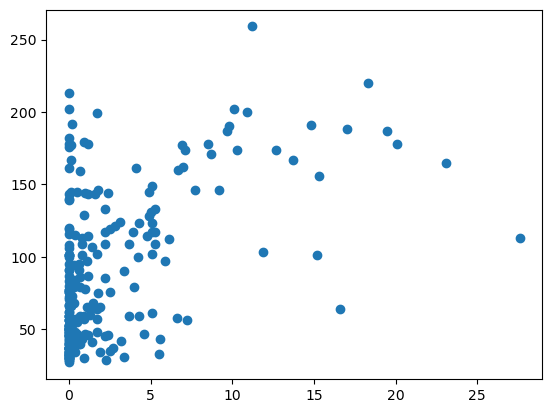

In [160]:
x_boa = dfBoA["PRECIP_TOTAL_DAY_MM"]
x_bob = dfBoB["PRECIP_TOTAL_DAY_MM"]
y_boa = dfBoA["SALES"]
y_bob = dfBoB["SALES"]
ax1=plt.scatter(x_boa,y_boa)
plt.show()

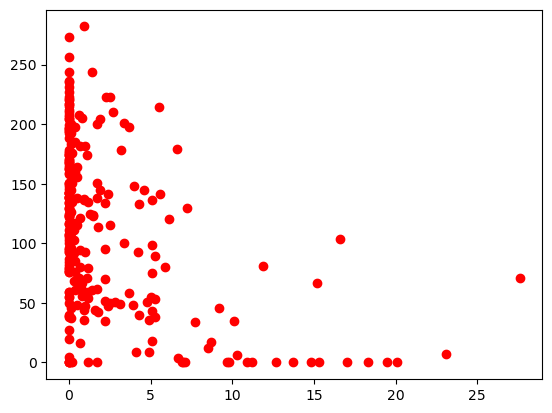

In [161]:
ax2=plt.scatter(x_bob,y_bob,color='red')
plt.show()

In [58]:
#faire apparaître les corrélations entre chaque colonne pour estimer grossièrement la boutique la plus a même de representer les données trouvées
dfBoA.corr()

,SALES,month,saison,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR
SALES,1.000000,0.111039,-0.008280,-0.395318,-0.293953,0.273759,-0.192233,-0.367251,-0.397866,0.522519,...,0.410263,-0.401813,-0.200374,-0.311605,0.354451,0.436626,0.373392,NaN,-0.154532,-0.410952
month,0.111039,1.000000,0.584574,0.153035,0.282335,0.094263,0.378973,0.203737,0.161389,0.189448,...,0.120544,0.149998,0.354145,0.289640,0.092928,0.085355,0.080441,NaN,0.121198,-0.188303
saison,-0.008280,0.584574,1.000000,0.444522,0.557723,0.004165,0.558093,0.489809,0.445695,0.114409,...,-0.016394,0.442263,0.529859,0.552740,0.034061,0.031500,0.030656,NaN,0.396986,0.124307
MAX_TEMPERATURE_C,-0.395318,0.153035,0.444522,1.000000,0.932709,-0.245646,0.840144,0.985795,0.988149,-0.281290,...,-0.517279,0.993644,0.802689,0.936192,-0.298837,-0.379915,-0.430812,NaN,0.626240,0.738668
MIN_TEMPERATURE_C,-0.293953,0.282335,0.557723,0.932709,1.000000,-0.093877,0.952412,0.967235,0.918702,-0.146307,...,-0.294130,0.926720,0.901726,0.991839,-0.141432,-0.218798,-0.254433,NaN,0.636464,0.615908
WINDSPEED_MAX_KMH,0.273759,0.094263,0.004165,-0.245646,-0.093877,1.000000,0.022570,-0.187376,-0.261786,0.377246,...,0.361309,-0.250802,-0.063908,-0.126342,0.376948,0.407056,0.408643,NaN,-0.098388,-0.249473
TEMPERATURE_MORNING_C,-0.192233,0.378973,0.558093,0.840144,0.952412,0.022570,1.000000,0.884182,0.832188,-0.025600,...,-0.124229,0.837342,0.932891,0.947690,-0.000716,-0.060811,-0.143185,NaN,0.615147,0.457914
TEMPERATURE_NOON_C,-0.367251,0.203737,0.489809,0.985795,0.967235,-0.187376,0.884182,1.000000,0.968107,-0.247892,...,-0.447788,0.979569,0.843337,0.971065,-0.250704,-0.337414,-0.382519,NaN,0.634853,0.707404
TEMPERATURE_EVENING_C,-0.397866,0.161389,0.445695,0.988149,0.918702,-0.261786,0.832188,0.968107,1.000000,-0.271948,...,-0.506265,0.983529,0.799850,0.922690,-0.299888,-0.365986,-0.416706,NaN,0.625742,0.721414
PRECIP_TOTAL_DAY_MM,0.522519,0.189448,0.114409,-0.281290,-0.146307,0.377246,-0.025600,-0.247892,-0.271948,1.000000,...,0.517458,-0.284407,-0.014685,-0.173861,0.537224,0.559867,0.500483,NaN,-0.146826,-0.431564


In [59]:
dfBoB.corr()

,SALES,month,saison,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR
SALES,1.000000,-0.050460,0.080906,0.490153,0.386630,-0.280258,0.284469,0.460135,0.497404,-0.440883,...,-0.402059,0.493664,0.292141,0.398815,-0.323245,-0.399750,-0.353925,NaN,0.250194,0.409978
month,-0.050460,1.000000,0.584574,0.153035,0.282335,0.094263,0.378973,0.203737,0.161389,0.189448,...,0.120544,0.149998,0.354145,0.289640,0.092928,0.085355,0.080441,NaN,0.121198,-0.188303
saison,0.080906,0.584574,1.000000,0.444522,0.557723,0.004165,0.558093,0.489809,0.445695,0.114409,...,-0.016394,0.442263,0.529859,0.552740,0.034061,0.031500,0.030656,NaN,0.396986,0.124307
MAX_TEMPERATURE_C,0.490153,0.153035,0.444522,1.000000,0.932709,-0.245646,0.840144,0.985795,0.988149,-0.281290,...,-0.517279,0.993644,0.802689,0.936192,-0.298837,-0.379915,-0.430812,NaN,0.626240,0.738668
MIN_TEMPERATURE_C,0.386630,0.282335,0.557723,0.932709,1.000000,-0.093877,0.952412,0.967235,0.918702,-0.146307,...,-0.294130,0.926720,0.901726,0.991839,-0.141432,-0.218798,-0.254433,NaN,0.636464,0.615908
WINDSPEED_MAX_KMH,-0.280258,0.094263,0.004165,-0.245646,-0.093877,1.000000,0.022570,-0.187376,-0.261786,0.377246,...,0.361309,-0.250802,-0.063908,-0.126342,0.376948,0.407056,0.408643,NaN,-0.098388,-0.249473
TEMPERATURE_MORNING_C,0.284469,0.378973,0.558093,0.840144,0.952412,0.022570,1.000000,0.884182,0.832188,-0.025600,...,-0.124229,0.837342,0.932891,0.947690,-0.000716,-0.060811,-0.143185,NaN,0.615147,0.457914
TEMPERATURE_NOON_C,0.460135,0.203737,0.489809,0.985795,0.967235,-0.187376,0.884182,1.000000,0.968107,-0.247892,...,-0.447788,0.979569,0.843337,0.971065,-0.250704,-0.337414,-0.382519,NaN,0.634853,0.707404
TEMPERATURE_EVENING_C,0.497404,0.161389,0.445695,0.988149,0.918702,-0.261786,0.832188,0.968107,1.000000,-0.271948,...,-0.506265,0.983529,0.799850,0.922690,-0.299888,-0.365986,-0.416706,NaN,0.625742,0.721414
PRECIP_TOTAL_DAY_MM,-0.440883,0.189448,0.114409,-0.281290,-0.146307,0.377246,-0.025600,-0.247892,-0.271948,1.000000,...,0.517458,-0.284407,-0.014685,-0.173861,0.537224,0.559867,0.500483,NaN,-0.146826,-0.431564


La même chose sera faite sur les 4 boutiques

In [60]:
dfMa['DATE'] = pd.to_datetime(dfMa['DATE'])
dfMa2.dropna(inplace=True)
dfMa2.sort_values(by=["ITEM","DATE"],inplace=True)

In [61]:
dfMa2=pd.merge(df1,dfMa,on="DATE",how="right")
dfMa2.dropna(inplace=True)
dfMa2.sort_values(by=["ITEM","DATE"],inplace=True)
dfMaA=dfMa2[(dfMa2["ITEM"] == "A")]
dfMaB=dfMa2[(dfMa2["ITEM"] == "B")]
dfMaA.corr()


,SALES,month,saison,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR
SALES,1.000000,0.111039,-0.008280,-0.306493,-0.282107,0.278994,-0.238367,-0.296744,-0.311484,0.291500,...,0.329584,-0.298257,-0.180378,-0.287963,0.230134,0.257658,0.193647,NaN,NaN,-0.360518
month,0.111039,1.000000,0.584574,0.270520,0.318255,0.048265,0.361370,0.287546,0.281576,0.232206,...,0.241729,0.276063,0.402877,0.333304,0.195596,0.150763,0.246988,NaN,NaN,-0.221825
saison,-0.008280,0.584574,1.000000,0.555020,0.572749,-0.075468,0.576786,0.560414,0.561987,0.164339,...,0.044002,0.566890,0.587520,0.572983,0.044474,0.068565,0.129015,NaN,NaN,0.105990
MAX_TEMPERATURE_C,-0.306493,0.270520,0.555020,1.000000,0.975295,-0.231934,0.961587,0.992777,0.989272,-0.112909,...,-0.294389,0.992319,0.897466,0.969235,-0.101512,-0.151472,-0.152987,NaN,NaN,0.616001
MIN_TEMPERATURE_C,-0.282107,0.318255,0.572749,0.975295,1.000000,-0.262294,0.977757,0.985240,0.964037,-0.069657,...,-0.236080,0.970662,0.922242,0.982758,-0.067585,-0.114638,-0.120410,NaN,NaN,0.562733
WINDSPEED_MAX_KMH,0.278994,0.048265,-0.075468,-0.231934,-0.262294,1.000000,-0.244924,-0.245586,-0.234588,0.216537,...,0.093919,-0.234492,-0.249439,-0.323773,0.137664,0.132477,0.113856,NaN,NaN,-0.138909
TEMPERATURE_MORNING_C,-0.238367,0.361370,0.576786,0.961587,0.977757,-0.244924,1.000000,0.972500,0.947080,-0.038230,...,-0.196895,0.963314,0.948278,0.978788,-0.039629,-0.067179,-0.069644,NaN,NaN,0.515680
TEMPERATURE_NOON_C,-0.296744,0.287546,0.560414,0.992777,0.985240,-0.245586,0.972500,1.000000,0.981195,-0.095811,...,-0.278319,0.987628,0.912553,0.982144,-0.092985,-0.144448,-0.134812,NaN,NaN,0.602949
TEMPERATURE_EVENING_C,-0.311484,0.281576,0.561987,0.989272,0.964037,-0.234588,0.947080,0.981195,1.000000,-0.123657,...,-0.306026,0.981857,0.887311,0.960318,-0.102065,-0.157506,-0.181361,NaN,NaN,0.615317
PRECIP_TOTAL_DAY_MM,0.291500,0.232206,0.164339,-0.112909,-0.069657,0.216537,-0.038230,-0.095811,-0.123657,1.000000,...,0.528176,-0.106214,0.053392,-0.058332,0.397161,0.570329,0.582314,NaN,NaN,-0.438607


La corrélation est faible peu importe le paramètre concernant le produit A

In [62]:
dfMaB.corr()

,SALES,month,saison,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR
SALES,1.000000,-0.050460,0.080906,0.376078,0.365130,-0.302464,0.326198,0.371805,0.373816,-0.244741,...,-0.316102,0.373939,0.277396,0.367932,-0.213677,-0.256913,-0.176279,NaN,NaN,0.383006
month,-0.050460,1.000000,0.584574,0.270520,0.318255,0.048265,0.361370,0.287546,0.281576,0.232206,...,0.241729,0.276063,0.402877,0.333304,0.195596,0.150763,0.246988,NaN,NaN,-0.221825
saison,0.080906,0.584574,1.000000,0.555020,0.572749,-0.075468,0.576786,0.560414,0.561987,0.164339,...,0.044002,0.566890,0.587520,0.572983,0.044474,0.068565,0.129015,NaN,NaN,0.105990
MAX_TEMPERATURE_C,0.376078,0.270520,0.555020,1.000000,0.975295,-0.231934,0.961587,0.992777,0.989272,-0.112909,...,-0.294389,0.992319,0.897466,0.969235,-0.101512,-0.151472,-0.152987,NaN,NaN,0.616001
MIN_TEMPERATURE_C,0.365130,0.318255,0.572749,0.975295,1.000000,-0.262294,0.977757,0.985240,0.964037,-0.069657,...,-0.236080,0.970662,0.922242,0.982758,-0.067585,-0.114638,-0.120410,NaN,NaN,0.562733
WINDSPEED_MAX_KMH,-0.302464,0.048265,-0.075468,-0.231934,-0.262294,1.000000,-0.244924,-0.245586,-0.234588,0.216537,...,0.093919,-0.234492,-0.249439,-0.323773,0.137664,0.132477,0.113856,NaN,NaN,-0.138909
TEMPERATURE_MORNING_C,0.326198,0.361370,0.576786,0.961587,0.977757,-0.244924,1.000000,0.972500,0.947080,-0.038230,...,-0.196895,0.963314,0.948278,0.978788,-0.039629,-0.067179,-0.069644,NaN,NaN,0.515680
TEMPERATURE_NOON_C,0.371805,0.287546,0.560414,0.992777,0.985240,-0.245586,0.972500,1.000000,0.981195,-0.095811,...,-0.278319,0.987628,0.912553,0.982144,-0.092985,-0.144448,-0.134812,NaN,NaN,0.602949
TEMPERATURE_EVENING_C,0.373816,0.281576,0.561987,0.989272,0.964037,-0.234588,0.947080,0.981195,1.000000,-0.123657,...,-0.306026,0.981857,0.887311,0.960318,-0.102065,-0.157506,-0.181361,NaN,NaN,0.615317
PRECIP_TOTAL_DAY_MM,-0.244741,0.232206,0.164339,-0.112909,-0.069657,0.216537,-0.038230,-0.095811,-0.123657,1.000000,...,0.528176,-0.106214,0.053392,-0.058332,0.397161,0.570329,0.582314,NaN,NaN,-0.438607


De même pour le produit B j'en déduis que Marseille ne correspond pas a la ville

In [63]:
dfLi['DATE'] = pd.to_datetime(dfLi['DATE'])
dfLi2=pd.merge(df1,dfLi,on="DATE",how="right")
dfLi2.dropna(inplace=True)
dfLi2.sort_values(by=["ITEM","DATE"],inplace=True)
dfLiA=dfLi2[(dfLi2["ITEM"] == "A")]
dfLiB=dfLi2[(dfLi2["ITEM"] == "B")]
dfLiA.corr()


,SALES,month,saison,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR
SALES,1.000000,0.111039,-0.008280,-0.355837,-0.319501,0.149142,-0.267080,-0.344427,-0.361828,0.173165,...,0.271625,-0.342638,-0.261620,-0.334802,0.114628,0.120853,0.106686,0.105629,NaN,-0.332874
month,0.111039,1.000000,0.584574,0.133094,0.185153,0.064767,0.232536,0.156647,0.126531,-0.026358,...,-0.022820,0.136333,0.206789,0.173929,-0.016345,-0.040455,-0.072641,-0.164514,NaN,-0.066363
saison,-0.008280,0.584574,1.000000,0.463666,0.494931,-0.040425,0.491860,0.484284,0.447825,-0.110122,...,-0.089673,0.456559,0.470691,0.499838,-0.105256,0.011612,-0.074646,-0.151479,NaN,0.207273
MAX_TEMPERATURE_C,-0.355837,0.133094,0.463666,1.000000,0.966923,-0.144589,0.911369,0.990658,0.990125,-0.174179,...,-0.441987,0.995553,0.877010,0.968211,-0.281130,-0.134757,-0.149920,-0.201588,NaN,0.744096
MIN_TEMPERATURE_C,-0.319501,0.185153,0.494931,0.966923,1.000000,-0.039827,0.967933,0.982905,0.961109,-0.100082,...,-0.296609,0.967400,0.913741,0.991011,-0.202104,-0.043760,-0.070511,-0.197920,NaN,0.665979
WINDSPEED_MAX_KMH,0.149142,0.064767,-0.040425,-0.144589,-0.039827,1.000000,0.062275,-0.101388,-0.171844,0.394561,...,0.466664,-0.134799,0.025614,-0.121276,0.377645,0.429801,0.347975,-0.041463,NaN,-0.329577
TEMPERATURE_MORNING_C,-0.267080,0.232536,0.491860,0.911369,0.967933,0.062275,1.000000,0.931232,0.898065,-0.022900,...,-0.169734,0.913581,0.922207,0.953524,-0.071500,0.082815,-0.014031,-0.185918,NaN,0.545788
TEMPERATURE_NOON_C,-0.344427,0.156647,0.484284,0.990658,0.982905,-0.101388,0.931232,1.000000,0.979238,-0.151087,...,-0.397684,0.988102,0.887918,0.981935,-0.258957,-0.113251,-0.110609,-0.193002,NaN,0.721575
TEMPERATURE_EVENING_C,-0.361828,0.126531,0.447825,0.990125,0.961109,-0.171844,0.898065,0.979238,1.000000,-0.175847,...,-0.431138,0.987085,0.874050,0.963704,-0.302574,-0.147004,-0.171311,-0.205065,NaN,0.742972
PRECIP_TOTAL_DAY_MM,0.173165,-0.026358,-0.110122,-0.174179,-0.100082,0.394561,-0.022900,-0.151087,-0.175847,1.000000,...,0.498755,-0.171474,0.025929,-0.130427,0.597511,0.628626,0.402837,0.154524,NaN,-0.316261


La corrélation entre les ventes du produit A ainsi que tout les autres paramètres sont trop faibles pour concorder avec 

In [64]:
dfLiB.corr()

,SALES,month,saison,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR
SALES,1.000000,-0.050460,0.080906,0.439506,0.401786,-0.144417,0.354439,0.428145,0.444003,-0.155646,...,-0.252282,0.427612,0.351005,0.414768,-0.114616,-0.106402,-0.078749,-0.110633,NaN,0.345861
month,-0.050460,1.000000,0.584574,0.133094,0.185153,0.064767,0.232536,0.156647,0.126531,-0.026358,...,-0.022820,0.136333,0.206789,0.173929,-0.016345,-0.040455,-0.072641,-0.164514,NaN,-0.066363
saison,0.080906,0.584574,1.000000,0.463666,0.494931,-0.040425,0.491860,0.484284,0.447825,-0.110122,...,-0.089673,0.456559,0.470691,0.499838,-0.105256,0.011612,-0.074646,-0.151479,NaN,0.207273
MAX_TEMPERATURE_C,0.439506,0.133094,0.463666,1.000000,0.966923,-0.144589,0.911369,0.990658,0.990125,-0.174179,...,-0.441987,0.995553,0.877010,0.968211,-0.281130,-0.134757,-0.149920,-0.201588,NaN,0.744096
MIN_TEMPERATURE_C,0.401786,0.185153,0.494931,0.966923,1.000000,-0.039827,0.967933,0.982905,0.961109,-0.100082,...,-0.296609,0.967400,0.913741,0.991011,-0.202104,-0.043760,-0.070511,-0.197920,NaN,0.665979
WINDSPEED_MAX_KMH,-0.144417,0.064767,-0.040425,-0.144589,-0.039827,1.000000,0.062275,-0.101388,-0.171844,0.394561,...,0.466664,-0.134799,0.025614,-0.121276,0.377645,0.429801,0.347975,-0.041463,NaN,-0.329577
TEMPERATURE_MORNING_C,0.354439,0.232536,0.491860,0.911369,0.967933,0.062275,1.000000,0.931232,0.898065,-0.022900,...,-0.169734,0.913581,0.922207,0.953524,-0.071500,0.082815,-0.014031,-0.185918,NaN,0.545788
TEMPERATURE_NOON_C,0.428145,0.156647,0.484284,0.990658,0.982905,-0.101388,0.931232,1.000000,0.979238,-0.151087,...,-0.397684,0.988102,0.887918,0.981935,-0.258957,-0.113251,-0.110609,-0.193002,NaN,0.721575
TEMPERATURE_EVENING_C,0.444003,0.126531,0.447825,0.990125,0.961109,-0.171844,0.898065,0.979238,1.000000,-0.175847,...,-0.431138,0.987085,0.874050,0.963704,-0.302574,-0.147004,-0.171311,-0.205065,NaN,0.742972
PRECIP_TOTAL_DAY_MM,-0.155646,-0.026358,-0.110122,-0.174179,-0.100082,0.394561,-0.022900,-0.151087,-0.175847,1.000000,...,0.498755,-0.171474,0.025929,-0.130427,0.597511,0.628626,0.402837,0.154524,NaN,-0.316261


In [65]:
dfLy['DATE'] = pd.to_datetime(dfLy['DATE'])
dfLy2=pd.merge(df1,dfLi,on="DATE",how="right")
dfLy2.dropna(inplace=True)
dfLy2.sort_values(by=["ITEM","DATE"],inplace=True)
dfLyA=dfLy2[(dfLy2["ITEM"] == "A")]
dfLyB=dfLy2[(dfLy2["ITEM"] == "B")]
dfLyA.corr()


,SALES,month,saison,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR
SALES,1.000000,0.111039,-0.008280,-0.355837,-0.319501,0.149142,-0.267080,-0.344427,-0.361828,0.173165,...,0.271625,-0.342638,-0.261620,-0.334802,0.114628,0.120853,0.106686,0.105629,NaN,-0.332874
month,0.111039,1.000000,0.584574,0.133094,0.185153,0.064767,0.232536,0.156647,0.126531,-0.026358,...,-0.022820,0.136333,0.206789,0.173929,-0.016345,-0.040455,-0.072641,-0.164514,NaN,-0.066363
saison,-0.008280,0.584574,1.000000,0.463666,0.494931,-0.040425,0.491860,0.484284,0.447825,-0.110122,...,-0.089673,0.456559,0.470691,0.499838,-0.105256,0.011612,-0.074646,-0.151479,NaN,0.207273
MAX_TEMPERATURE_C,-0.355837,0.133094,0.463666,1.000000,0.966923,-0.144589,0.911369,0.990658,0.990125,-0.174179,...,-0.441987,0.995553,0.877010,0.968211,-0.281130,-0.134757,-0.149920,-0.201588,NaN,0.744096
MIN_TEMPERATURE_C,-0.319501,0.185153,0.494931,0.966923,1.000000,-0.039827,0.967933,0.982905,0.961109,-0.100082,...,-0.296609,0.967400,0.913741,0.991011,-0.202104,-0.043760,-0.070511,-0.197920,NaN,0.665979
WINDSPEED_MAX_KMH,0.149142,0.064767,-0.040425,-0.144589,-0.039827,1.000000,0.062275,-0.101388,-0.171844,0.394561,...,0.466664,-0.134799,0.025614,-0.121276,0.377645,0.429801,0.347975,-0.041463,NaN,-0.329577
TEMPERATURE_MORNING_C,-0.267080,0.232536,0.491860,0.911369,0.967933,0.062275,1.000000,0.931232,0.898065,-0.022900,...,-0.169734,0.913581,0.922207,0.953524,-0.071500,0.082815,-0.014031,-0.185918,NaN,0.545788
TEMPERATURE_NOON_C,-0.344427,0.156647,0.484284,0.990658,0.982905,-0.101388,0.931232,1.000000,0.979238,-0.151087,...,-0.397684,0.988102,0.887918,0.981935,-0.258957,-0.113251,-0.110609,-0.193002,NaN,0.721575
TEMPERATURE_EVENING_C,-0.361828,0.126531,0.447825,0.990125,0.961109,-0.171844,0.898065,0.979238,1.000000,-0.175847,...,-0.431138,0.987085,0.874050,0.963704,-0.302574,-0.147004,-0.171311,-0.205065,NaN,0.742972
PRECIP_TOTAL_DAY_MM,0.173165,-0.026358,-0.110122,-0.174179,-0.100082,0.394561,-0.022900,-0.151087,-0.175847,1.000000,...,0.498755,-0.171474,0.025929,-0.130427,0.597511,0.628626,0.402837,0.154524,NaN,-0.316261


In [66]:
dfLyB.corr()

,SALES,month,saison,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR
SALES,1.000000,-0.050460,0.080906,0.439506,0.401786,-0.144417,0.354439,0.428145,0.444003,-0.155646,...,-0.252282,0.427612,0.351005,0.414768,-0.114616,-0.106402,-0.078749,-0.110633,NaN,0.345861
month,-0.050460,1.000000,0.584574,0.133094,0.185153,0.064767,0.232536,0.156647,0.126531,-0.026358,...,-0.022820,0.136333,0.206789,0.173929,-0.016345,-0.040455,-0.072641,-0.164514,NaN,-0.066363
saison,0.080906,0.584574,1.000000,0.463666,0.494931,-0.040425,0.491860,0.484284,0.447825,-0.110122,...,-0.089673,0.456559,0.470691,0.499838,-0.105256,0.011612,-0.074646,-0.151479,NaN,0.207273
MAX_TEMPERATURE_C,0.439506,0.133094,0.463666,1.000000,0.966923,-0.144589,0.911369,0.990658,0.990125,-0.174179,...,-0.441987,0.995553,0.877010,0.968211,-0.281130,-0.134757,-0.149920,-0.201588,NaN,0.744096
MIN_TEMPERATURE_C,0.401786,0.185153,0.494931,0.966923,1.000000,-0.039827,0.967933,0.982905,0.961109,-0.100082,...,-0.296609,0.967400,0.913741,0.991011,-0.202104,-0.043760,-0.070511,-0.197920,NaN,0.665979
WINDSPEED_MAX_KMH,-0.144417,0.064767,-0.040425,-0.144589,-0.039827,1.000000,0.062275,-0.101388,-0.171844,0.394561,...,0.466664,-0.134799,0.025614,-0.121276,0.377645,0.429801,0.347975,-0.041463,NaN,-0.329577
TEMPERATURE_MORNING_C,0.354439,0.232536,0.491860,0.911369,0.967933,0.062275,1.000000,0.931232,0.898065,-0.022900,...,-0.169734,0.913581,0.922207,0.953524,-0.071500,0.082815,-0.014031,-0.185918,NaN,0.545788
TEMPERATURE_NOON_C,0.428145,0.156647,0.484284,0.990658,0.982905,-0.101388,0.931232,1.000000,0.979238,-0.151087,...,-0.397684,0.988102,0.887918,0.981935,-0.258957,-0.113251,-0.110609,-0.193002,NaN,0.721575
TEMPERATURE_EVENING_C,0.444003,0.126531,0.447825,0.990125,0.961109,-0.171844,0.898065,0.979238,1.000000,-0.175847,...,-0.431138,0.987085,0.874050,0.963704,-0.302574,-0.147004,-0.171311,-0.205065,NaN,0.742972
PRECIP_TOTAL_DAY_MM,-0.155646,-0.026358,-0.110122,-0.174179,-0.100082,0.394561,-0.022900,-0.151087,-0.175847,1.000000,...,0.498755,-0.171474,0.025929,-0.130427,0.597511,0.628626,0.402837,0.154524,NaN,-0.316261


Les ventes étant corrélées à la météo, la boutique la plus a meme de représenter les ventes décrite lors de la question 1 est celle de Bordeaux, car la corrélation entreles ventes et les autres paramètres pour les deux produits est la plus probante

In [67]:
dfBoA.corr()

,SALES,month,saison,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR
SALES,1.000000,0.111039,-0.008280,-0.395318,-0.293953,0.273759,-0.192233,-0.367251,-0.397866,0.522519,...,0.410263,-0.401813,-0.200374,-0.311605,0.354451,0.436626,0.373392,NaN,-0.154532,-0.410952
month,0.111039,1.000000,0.584574,0.153035,0.282335,0.094263,0.378973,0.203737,0.161389,0.189448,...,0.120544,0.149998,0.354145,0.289640,0.092928,0.085355,0.080441,NaN,0.121198,-0.188303
saison,-0.008280,0.584574,1.000000,0.444522,0.557723,0.004165,0.558093,0.489809,0.445695,0.114409,...,-0.016394,0.442263,0.529859,0.552740,0.034061,0.031500,0.030656,NaN,0.396986,0.124307
MAX_TEMPERATURE_C,-0.395318,0.153035,0.444522,1.000000,0.932709,-0.245646,0.840144,0.985795,0.988149,-0.281290,...,-0.517279,0.993644,0.802689,0.936192,-0.298837,-0.379915,-0.430812,NaN,0.626240,0.738668
MIN_TEMPERATURE_C,-0.293953,0.282335,0.557723,0.932709,1.000000,-0.093877,0.952412,0.967235,0.918702,-0.146307,...,-0.294130,0.926720,0.901726,0.991839,-0.141432,-0.218798,-0.254433,NaN,0.636464,0.615908
WINDSPEED_MAX_KMH,0.273759,0.094263,0.004165,-0.245646,-0.093877,1.000000,0.022570,-0.187376,-0.261786,0.377246,...,0.361309,-0.250802,-0.063908,-0.126342,0.376948,0.407056,0.408643,NaN,-0.098388,-0.249473
TEMPERATURE_MORNING_C,-0.192233,0.378973,0.558093,0.840144,0.952412,0.022570,1.000000,0.884182,0.832188,-0.025600,...,-0.124229,0.837342,0.932891,0.947690,-0.000716,-0.060811,-0.143185,NaN,0.615147,0.457914
TEMPERATURE_NOON_C,-0.367251,0.203737,0.489809,0.985795,0.967235,-0.187376,0.884182,1.000000,0.968107,-0.247892,...,-0.447788,0.979569,0.843337,0.971065,-0.250704,-0.337414,-0.382519,NaN,0.634853,0.707404
TEMPERATURE_EVENING_C,-0.397866,0.161389,0.445695,0.988149,0.918702,-0.261786,0.832188,0.968107,1.000000,-0.271948,...,-0.506265,0.983529,0.799850,0.922690,-0.299888,-0.365986,-0.416706,NaN,0.625742,0.721414
PRECIP_TOTAL_DAY_MM,0.522519,0.189448,0.114409,-0.281290,-0.146307,0.377246,-0.025600,-0.247892,-0.271948,1.000000,...,0.517458,-0.284407,-0.014685,-0.173861,0.537224,0.559867,0.500483,NaN,-0.146826,-0.431564


In [68]:
dfBoB.corr()

,SALES,month,saison,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR
SALES,1.000000,-0.050460,0.080906,0.490153,0.386630,-0.280258,0.284469,0.460135,0.497404,-0.440883,...,-0.402059,0.493664,0.292141,0.398815,-0.323245,-0.399750,-0.353925,NaN,0.250194,0.409978
month,-0.050460,1.000000,0.584574,0.153035,0.282335,0.094263,0.378973,0.203737,0.161389,0.189448,...,0.120544,0.149998,0.354145,0.289640,0.092928,0.085355,0.080441,NaN,0.121198,-0.188303
saison,0.080906,0.584574,1.000000,0.444522,0.557723,0.004165,0.558093,0.489809,0.445695,0.114409,...,-0.016394,0.442263,0.529859,0.552740,0.034061,0.031500,0.030656,NaN,0.396986,0.124307
MAX_TEMPERATURE_C,0.490153,0.153035,0.444522,1.000000,0.932709,-0.245646,0.840144,0.985795,0.988149,-0.281290,...,-0.517279,0.993644,0.802689,0.936192,-0.298837,-0.379915,-0.430812,NaN,0.626240,0.738668
MIN_TEMPERATURE_C,0.386630,0.282335,0.557723,0.932709,1.000000,-0.093877,0.952412,0.967235,0.918702,-0.146307,...,-0.294130,0.926720,0.901726,0.991839,-0.141432,-0.218798,-0.254433,NaN,0.636464,0.615908
WINDSPEED_MAX_KMH,-0.280258,0.094263,0.004165,-0.245646,-0.093877,1.000000,0.022570,-0.187376,-0.261786,0.377246,...,0.361309,-0.250802,-0.063908,-0.126342,0.376948,0.407056,0.408643,NaN,-0.098388,-0.249473
TEMPERATURE_MORNING_C,0.284469,0.378973,0.558093,0.840144,0.952412,0.022570,1.000000,0.884182,0.832188,-0.025600,...,-0.124229,0.837342,0.932891,0.947690,-0.000716,-0.060811,-0.143185,NaN,0.615147,0.457914
TEMPERATURE_NOON_C,0.460135,0.203737,0.489809,0.985795,0.967235,-0.187376,0.884182,1.000000,0.968107,-0.247892,...,-0.447788,0.979569,0.843337,0.971065,-0.250704,-0.337414,-0.382519,NaN,0.634853,0.707404
TEMPERATURE_EVENING_C,0.497404,0.161389,0.445695,0.988149,0.918702,-0.261786,0.832188,0.968107,1.000000,-0.271948,...,-0.506265,0.983529,0.799850,0.922690,-0.299888,-0.365986,-0.416706,NaN,0.625742,0.721414
PRECIP_TOTAL_DAY_MM,-0.440883,0.189448,0.114409,-0.281290,-0.146307,0.377246,-0.025600,-0.247892,-0.271948,1.000000,...,0.517458,-0.284407,-0.014685,-0.173861,0.537224,0.559867,0.500483,NaN,-0.146826,-0.431564


In [69]:
#Supprimer les colonnes avec les corrélations les plus faibles
dfBoA.drop(["month","saison","TOTAL_SNOW_MM","VISIBILITY_AVG_KM"],axis=1,inplace=True)
dfBoB.drop(["month","saison","TOTAL_SNOW_MM","VISIBILITY_AVG_KM"],axis=1,inplace=True)

C:\Users\elyes\AppData\Local\Temp\ipykernel_13964\3979159676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBoA.drop(["month","saison","TOTAL_SNOW_MM","VISIBILITY_AVG_KM"],axis=1,inplace=True)
C:\Users\elyes\AppData\Local\Temp\ipykernel_13964\3979159676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBoB.drop(["month","saison","TOTAL_SNOW_MM","VISIBILITY_AVG_KM"],axis=1,inplace=True)


In [70]:
dfBoA.head()

,DATE,ITEM,SALES,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,UV_INDEX,SUNHOUR,OPINION
1,2019-01-02,A,213.0,9,4,14,5,7,6,0.0,...,27.500,9,3,2,122,116,116,1,8.7,météo très défavorable
3,2019-01-03,A,80.0,7,2,15,1,5,5,0.0,...,22.125,7,0,-2,116,116,116,1,8.7,météo très défavorable
6,2019-01-05,A,48.0,6,1,9,0,4,4,0.0,...,9.250,6,0,-1,116,116,116,1,8.7,météo très défavorable
8,2019-01-06,A,30.0,5,0,10,-1,4,3,0.0,...,32.875,5,0,-2,143,116,116,1,8.7,météo très défavorable
11,2019-01-08,A,65.0,9,6,10,5,8,7,1.1,...,87.000,9,8,4,248,143,266,1,3.4,météo défavorable


In [71]:
dfBoB.head()

,DATE,ITEM,SALES,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,UV_INDEX,SUNHOUR,OPINION
2,2019-01-02,B,0.0,9,4,14,5,7,6,0.0,...,27.500,9,3,2,122,116,116,1,8.7,météo très défavorable
4,2019-01-03,B,94.0,7,2,15,1,5,5,0.0,...,22.125,7,0,-2,116,116,116,1,8.7,météo très défavorable
7,2019-01-05,B,143.0,6,1,9,0,4,4,0.0,...,9.250,6,0,-1,116,116,116,1,8.7,météo très défavorable
9,2019-01-06,B,256.0,5,0,10,-1,4,3,0.0,...,32.875,5,0,-2,143,116,116,1,8.7,météo très défavorable
12,2019-01-08,B,174.0,9,6,10,5,8,7,1.1,...,87.000,9,8,4,248,143,266,1,3.4,météo défavorable


In [165]:
dfBoA[["SALES","MAX_TEMPERATURE_C","WINDSPEED_MAX_KMH","PRECIP_TOTAL_DAY_MM","HUMIDITY_MAX_PERCENT","CLOUDCOVER_AVG_PERCENT"]].corr()

,SALES,MAX_TEMPERATURE_C,WINDSPEED_MAX_KMH,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,CLOUDCOVER_AVG_PERCENT
SALES,1.000000,-0.395318,0.273759,0.522519,0.356114,0.410263
MAX_TEMPERATURE_C,-0.395318,1.000000,-0.245646,-0.281290,-0.628697,-0.517279
WINDSPEED_MAX_KMH,0.273759,-0.245646,1.000000,0.377246,-0.002698,0.361309
PRECIP_TOTAL_DAY_MM,0.522519,-0.281290,0.377246,1.000000,0.371249,0.517458
HUMIDITY_MAX_PERCENT,0.356114,-0.628697,-0.002698,0.371249,1.000000,0.576854
CLOUDCOVER_AVG_PERCENT,0.410263,-0.517279,0.361309,0.517458,0.576854,1.000000


In [101]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy import stats

In [156]:
pearson_coef_prec_A, p_value_prec_A = stats.pearsonr(dfBoA["PRECIP_TOTAL_DAY_MM"], dfBoA["SALES"])
print("Le Coefficient de Correlation Pearson ", pearson_coef_prec_A, " avec une P-value de P =", p_value_prec_A)  

Le Coefficient de Correlation Pearson  0.5225187593090921  avec une P-value de P = 1.2859204415502256e-19


In [157]:
pearson_coef_prec_B, p_value_prec_B = stats.pearsonr(dfBoB["PRECIP_TOTAL_DAY_MM"], dfBoB["SALES"])
print("Le Coefficient de Correlation Pearson ", pearson_coef_prec_B, " avec une P-value de P =", p_value_prec_B)  

Le Coefficient de Correlation Pearson  -0.4408832409529786  avec une P-value de P = 8.62292863397618e-14


Les précipitations en mm par jour de pluie est le paramètre le plus important pour estimer la corrélation des ventes des produit, corrélation positive dans le cas du produit A et négative pour le B,
La valeur p est <<< 0,001 nous avons donc une grande probabilité (certitude) que la corrélation n'est pas du au hasard

In [83]:
pearson_coef_wind_A, p_value_wind_A = stats.pearsonr(dfBoA["WINDSPEED_MAX_KMH"], dfBoA["SALES"])
print("Le Coefficient de Correlation Pearson ", pearson_coef_wind_A, " avec une P-value de P =", p_value_wind_A)
pearson_coef_wind_B, p_value_wind_B = stats.pearsonr(dfBoB["WINDSPEED_MAX_KMH"], dfBoB["SALES"])
print("Le Coefficient de Correlation Pearson ", pearson_coef_wind_B, " avec une P-value de P =", p_value_wind_B)  

Le Coefficient de Correlation Pearson  0.273758809509209  avec une P-value de P = 7.505920420437878e-06
Le Coefficient de Correlation Pearson  -0.28025754128715663  avec une P-value de P = 4.44203778623001e-06


In [86]:
pearson_coef_windt_A, p_value_windt_A = stats.pearsonr(dfBoA["WINDTEMP_MAX_C"], dfBoA["SALES"])
print("Le Coefficient de Correlation Pearson ", pearson_coef_windt_A, " avec une P-value de P =", p_value_windt_A)
pearson_coef_windt_B, p_value_windt_B = stats.pearsonr(dfBoB["WINDTEMP_MAX_C"], dfBoB["SALES"])
print("Le Coefficient de Correlation Pearson ", pearson_coef_windt_B, " avec une P-value de P =", p_value_windt_B)

Le Coefficient de Correlation Pearson  -0.3116052539910914  avec une P-value de P = 2.9201471407469166e-07
Le Coefficient de Correlation Pearson  0.39881483720195465  avec une P-value de P = 2.4079487206808776e-11


Une corrélation existe entre le vent (température et vitesse) ainsi que les ventes cependant certains paramètres sont plus interessant à prendre en considération comme les précipitations et la température en journée, surtout que la temperature du vent est le paramètre dont le coef est le plus élever

On crée une régression linéaire

In [217]:
lm=LinearRegression()
lm

LinearRegression()

In [218]:
Z=dfBoA[["MAX_TEMPERATURE_C","WINDSPEED_MAX_KMH","PRECIP_TOTAL_DAY_MM","HUMIDITY_MAX_PERCENT","CLOUDCOVER_AVG_PERCENT"]]

on fit a fin de trouver les valeurs de l'équation

In [219]:
lm.fit(Z,dfBoA["SALES"])

LinearRegression()

In [223]:
lm.intercept_

81.45749978891646

In [224]:
lm.coef_

array([-1.53294082,  0.43234916,  4.66903269,  0.17770417,  0.07760244])

l'équation du modèle pour le produit A est :
y_a= 81.46 -1.53*x_1 +0.432*x_2 + 4.67*x_3 + 0.178*x_4 + 0.078*x_5

In [225]:
path_pred = 'https://raw.githubusercontent.com/murpi/wilddata/master/test/forecast.csv'
dfPred=pd.read_csv(path_pred)

In [226]:
dfPred.drop(["DATE","VISIBILITY_AVG_KM","PRESSURE_MAX_MB","MIN_TEMPERATURE_C"],axis=1,inplace=True)
dfPred.astype(float)

,MAX_TEMPERATURE_C,WINDSPEED_MAX_KMH,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,CLOUDCOVER_AVG_PERCENT
0,20.0,23.0,2.0,92.0,61.0
1,25.0,10.0,0.0,73.0,26.0
2,25.0,19.0,0.0,79.0,19.0
3,32.0,12.0,0.0,76.0,2.0
4,28.0,13.0,1.0,82.0,36.0
5,20.0,19.0,0.0,88.0,89.0
6,21.0,31.0,1.0,89.0,76.0


In [227]:
y_hat_predA=lm.predict(dfPred)

a partir de la nous faisons une prediction des ventes a partir de la data que l'on a

In [228]:
y_hat_predA

array([91.16331185, 62.44753864, 66.86168895, 51.25230509, 66.19015829,
       81.55790159, 89.05105575])

C:\Users\elyes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\elyes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


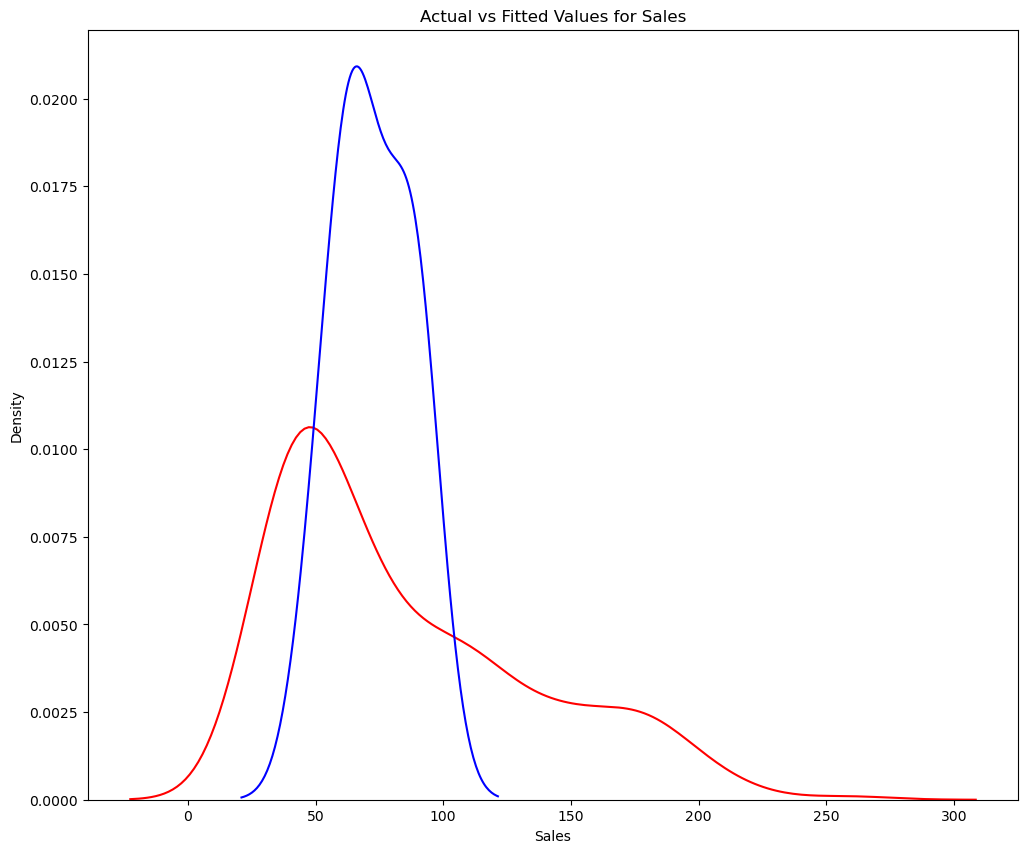

In [229]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(dfBoA['SALES'], hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_predA, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Sales')
plt.xlabel('Sales')

plt.show()
plt.close()

Il y'a une grande erreur sur les valeurs fitter

In [ ]:
Nous suivons les mêmes etapes pour le produit B

In [230]:
lm.fit(Z,dfBoB["SALES"])

LinearRegression()

In [231]:
lm.intercept_

94.29496668306652

In [232]:
lm.coef_

array([ 3.34280844, -0.93459452, -4.52319025, -0.30367759, -0.03077228])

In [233]:
y_hat_predB=lm.predict(dfPred)

In [234]:
y_hat_predB

array([100.79363439, 145.55068955, 135.53267931, 166.90866142,
       145.21132004, 113.9314796 , 101.63232557])

C:\Users\elyes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\elyes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


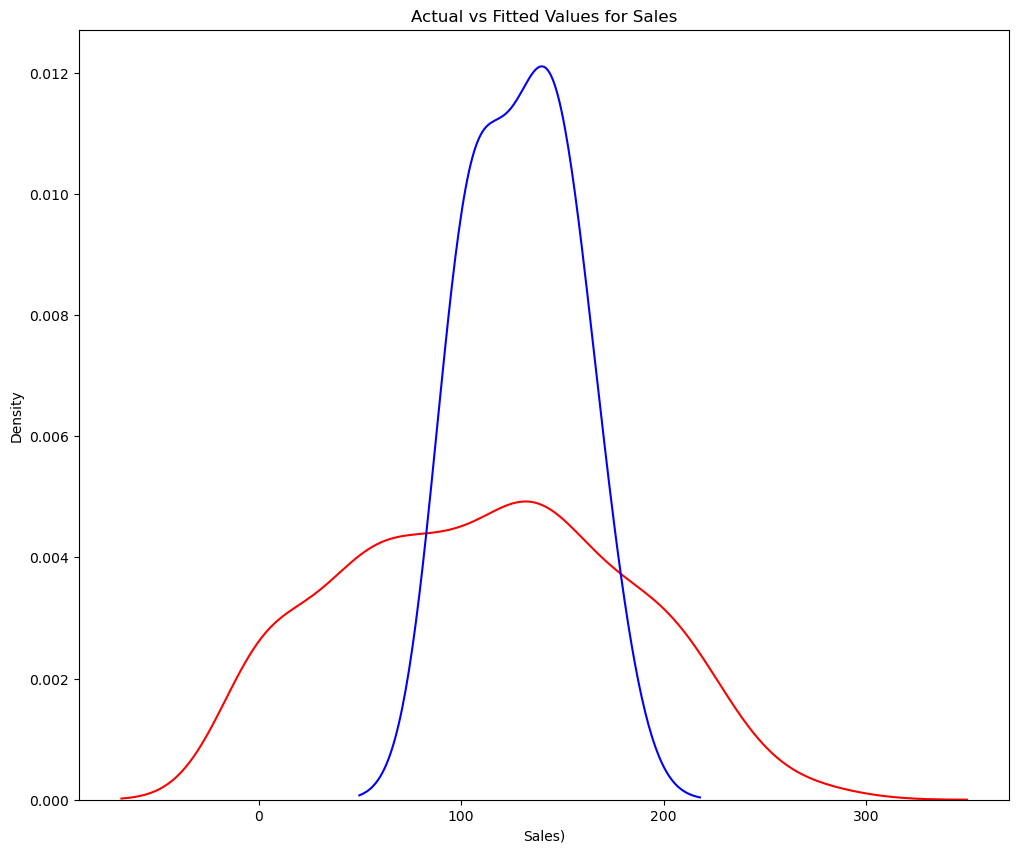

In [235]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(dfBoB['SALES'], hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_predB, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Sales')
plt.xlabel('Sales)')

plt.show()
plt.close()

De même le modele n'est pas idéal